In [140]:
%matplotlib inline
import sys
sys.path.insert(0, "/Users/Matias/anaconda/lib/python2.7/site-packages/")
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import iso_forest as iso
import copy

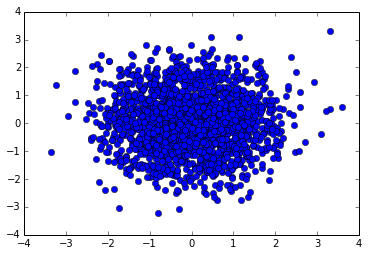

In [4]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 2000
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
plt.plot(x,y,'bo')

In [191]:
F = iso.iForest(X,ntrees=100, sample_size=512)

In [192]:
S=F.compute_paths(X_in=X)
ss=np.argsort(S)

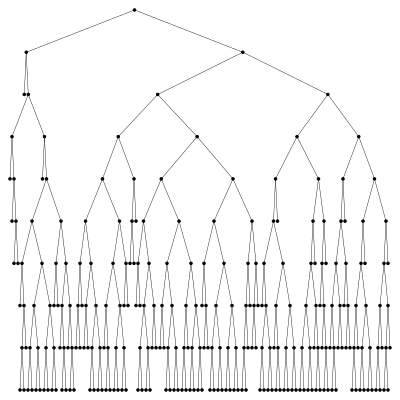

In [193]:
jt=1
T=F.Trees[jt]
gg=iso.gen_graph(iso.all_branches(T.root,[],None))
vstyle={}
vstyle["vertex_size"]=[2.5]*gg.vcount()
vstyle["vertex_color"]=['black']*gg.vcount()
#vstyle["vertex_label"]=g.vs['name']
vstyle["vertex_label_dist"]=2
vstyle["bbox"] = (400, 400)
vstyle["edge_color"]= [(0,0.,0.)]*gg.ecount()
vstyle["edge_width"] = [0.4]*gg.ecount()
vstyle["layout"]=gg.layout_reingold_tilford(root=[0])
vstyle["edge_curved"]=0.00
vstyle["margin"]=10
ig.plot(gg,**vstyle)

14.4234727583


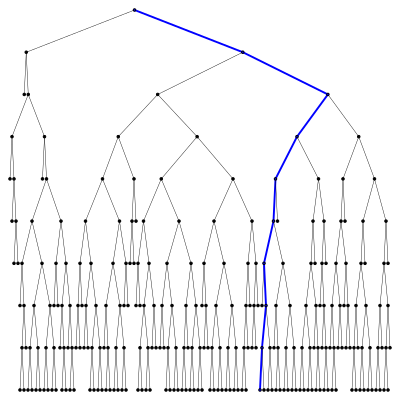

In [195]:
P=iso.PathFactor(X[ss[0]],T)
print P.e
Gn=iso.branch2num(P.path_list)
lb=gg.get_shortest_paths(str(Gn[0]), str(Gn[-1]))[0]
le=gg.get_eids([(lb[i],lb[i+1]) for i in xrange(len(lb)-1)])
vstyle2 = copy.deepcopy(vstyle)
for j in le: 
    vstyle2["edge_color"][j]= 'blue'
    vstyle2["edge_width"][j] = 1.9
for v in lb:
    vstyle2["vertex_color"][v]='blue'
ig.plot(gg,**vstyle2)